## 개요
- 교과목: 빅데이터 분석 및 시각화
- 능력단위: 머신러닝 기반 데이터 분석
- 훈련교사명: 정지훈 강사
- 수강생명: 홍길동
- 평가방법: 기타(작업형)
- 평가예정일: 2021년 12월 9일 목요일 (1시간)

## 평가
- 다음은 파이썬을 활용한 머신러닝 코드 예제입니다. 
- 빈칸에 `# 코드 입력`란에 적당한 코드를 작성하시기를 바랍니다. 
- 각 빈칸당 10점입니다. 

### 라이브러리 및 데이터 불러오기

In [1]:
from sklearn.datasets import load_iris

# 붓꽃 데이터 세트 불러오기
# (1) 코드 작성 바랍니다. 
iris = load_iris()

# 독립변수 & 종속변수 데이터 불러오기
iris_data = iris.data
iris_target = iris.target


# 아래 예시
print("iris target 값:", iris_target)
print("iris target 명:", iris.target_names)

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


## 데이터 시각화 화기
- 종별로 구분이 가능한 변수간 산점도를 작성한다. 

In [2]:
# pandas 라이브러리 불러오기
# (2) 코드 작성 바랍니다. 
import pandas as pd

# 배열을 데이터프레임으로 변환하기
df_iris = pd.DataFrame(data = iris_data, columns=['sepal length','sepal width','petal length','petal width'])
df_iris['target'] = iris.target

# replace를 활용하여 0, 1, 2를 순차적으로 setosa, versicolor, virginica로 바꾼다. 
# (3) 코드 작성
df_iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


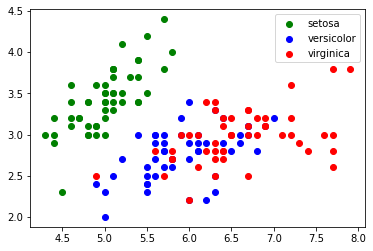

In [3]:
import matplotlib.pyplot as plt 

# 산점도 코드를 작성한다.  
setosa = df_iris[df_iris['target'] ==0]
versicolor = df_iris[df_iris['target'] ==1]
virginica = df_iris[df_iris['target'] ==2]


setosa_sc = plt.scatter(setosa['sepal length'],setosa['sepal width'], color='green')
versicolor_sc = plt.scatter(versicolor['sepal length'],versicolor['sepal width'], color='blue')
virginica_sc = plt.scatter(virginica['sepal length'],virginica['sepal width'],color='red')


plt.legend((setosa_sc,versicolor_sc,virginica_sc), ('setosa','versicolor','virginica'))

plt.show()

## 데이터셋 분리 
- 머신러닝 모형 학습을 위해서는 훈련 데이터셋과 테스트셋으로 구분해야 합니다. 

In [4]:
from sklearn.model_selection import train_test_split

# 머신러닝 모형을 학습하기 위해 주어진 데이터를 X_train, X_test, y_train, y_test 분리하는 코드를 작성한다. 
# (5)
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.3, random_state=11)

## Decision Tree 객체 생성
- 의사결정 트리 모형을 생성한다. 

In [5]:
# 분류 모형 객체 생성을 위해 라이브러리 및 객체 생성을 정의한다.  

# (6)
from sklearn.tree import DecisionTreeClassifier
# (7)
dt_dtc = DecisionTreeClassifier(random_state=11)

## 학습 수행
- 이렇게 학습된 DecisionTreeClassifier 객체를 이용해 예측 수행. 

In [9]:
# 모형 학습 코드 생성
# (8)
dt_dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

## 테스트
- 테스트 데이터 세트로 예측을 수행한다. 

In [7]:
# 모형 학습 후 예측 값 설정
# (9) 
pred = dt_dtc.predict(x_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       2])

## 예측 정확도
- 예측 데이터가 산출이 되면, 그 다음부터는 예측 성능을 평가하도록 한다. 

In [8]:
from sklearn.metrics import accuracy_score

# 예측 정확도를 산출한다. 
# (10)
print("accuracy:",accuracy_score(y_test,pred))

accuracy: 0.9111111111111111
